# WeatherPy
----

###### Analysis


============================

Statement:  Prove that as you get closer to the equator it gets hotter.


1. LATITUDE VS MAX TEMP

The Latitude vs Max Temperature linear regression plot for northern hemisphere cities, shows a 'strong negative correlation' (r2= 0.7016) at this time. The further away from the equator (being 0 lat) to a larger positive latitude, the lower the maximum temperature. (Note the r-square value is near the cutoff between a strong to moderate fit.)

The Latitude vs Max Temperature linear regression plot for southern hemisphere cities, shows 'a moderate positive correlation' (r2=0.52) between negative Latitudes in the Southern hemisphere increasing, to zero latitude (equator), and the max temperature increasing. 
(Note: This is a close moderate fit when they are near cutoffs of weak,(<0.5), moderate (>=0.5) correlation.)


Additionally, the scatter plot 'City Latitude vs Max Temperature' shows a general trend of the above statements, that as you get close to the equator, generally it will have higher temperatures, as seen by the clustering. The plot peaks with some high temperatures noticed at +- 20 degrees Fahrenheit. This data could have outliers, or it could be good data with other scenarious for this effect to happen. 
Thus, as you get within 20 degrees latitute of the equator, some of the results may not fit this trend.

Therfore, 'generally', one can say that as you get closer to the equator it gets hotter. This statement fits better with northern hemisphere data than southern. This statement fits better if the latitudes are not within +- 20 degrees latitude of the equator. (According to the data collected at this particular time and at these particular random cities) 

General FIT of the Model:
Linear regression is good way to see how these temperatures deviate from the norm.
As well, the northern vs southern hemisphere split, created a binary variable. This helped to reduce some of the 'noise' in the model. There may be better models and perhaps more variables to include to make this a better fit. (ie, latitude, humidity, and temperature together)
Thus, if one included more variables in the model (multivariable), the model will no longer be linear, and we might see a better fit of proving that the temperatures gets hotter as one gets closer to the equator.



2. LATITUDE VS HUMIDITY

The linear regression 'Latitude vs Humidity' plot in the 'northern hemisphere' for cities shows that no correlation can be defined. The r-sqared value of 0.038 says that the is a very weak to no relationship.

The Latitude vs Humidity plot for the southern hemisphere cities shows no correlation. The r-squared value of 0.0019. This is very low and close to zero. Thus, no correlation can be defined.

3. LATITUDE VS CLOUDINESS

The Latitude vs Cloudiness plot for the northern hemisphere cities shows no correlation. The r-squared value of 0.0078 is low and close to zero. Thus, no correlation can be determined.

The Latitude vs Cloudiness plot for the southern hemisphere cities shows no correlation between them. The r-square value of 0.128 is no correlation or if there was it would be very weak, no correlation can be determined.

4. LATITUDE VS WIND SPEED

The Latitude vs Wind Speed plot the northern hemisphere cities shows no correlation between them. The r-squared value is 0.0124 which is close to zero and thus no correlation can be defined.

The Latitude vs Wind Speed plot for the southern hemisphere cities shows no correlation. The r-sqared value of 0.00016 is close to zero and thus no correlation can be determined for Latitude vs Wind Speed in the Southern Hemishere cities.


Therefore, no correlation was found individually with humidity, cloudiness and wind speed vs latitude, in both the southern and northern hemispheres as seen by the low r-sqared values. Thus, we can not make a good prediction of these values based on latitude.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime as dt
from time import sleep


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

output_folder = "../output_data_files/"
output_data_file = "../output_data_files/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of unique cities identified: {len(cities)}")


# Create dataFrame for city data
city_list = pd.DataFrame({"City":cities})


Number of unique cities identified: 624


In [3]:
# * Save a CSV of all retrieved data and a PNG image for each scatter plot.
# save to csv file
city_list.to_csv(output_data_file, encoding='utf-8', index=True)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# API Information
# api.openweathermap.org for your API calls
# API documentation https://openweathermap.org/api
# Documents show that max of 60 calls, then you must wait one minute. 
# Thus, after 50 successful calls, sleep for one minute.

#End Point:
url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
units = "imperial"
params = {'appid' : weather_api_key,
          'units':units}

city_weather_data = []

#Defined function for requesting information from api
def getWeatherInfo(city):
    data =''
    params['q'] = city
    try:
        response = requests.get(url=url, params=params)
        if response.status_code == 200:
            data = response.json()

    except requests.exceptions.RequestException as e:
        #raise SystemExit(e)
        print(e)
    finally:
        return data
        
print("Beginning Data Retrieval")
print("-" * 40)
count = 0
sets = 1

for city in cities:
    wInfo = getWeatherInfo(city)
    #check if information was returned
    if wInfo :
        if wInfo != '':
            #once reached 50 here, reset cnt, and set and sleep before next request
            if count == 50:
                count = 1
                sets += 1
                sleep(60)   #documents 1 min for every 60 items
            else:
                count +=1

            print(f"Processing Record {count} of Set {sets} | {city}")
            #add to the weather dataframe
            dWeather = {}
            try:
                dWeather['City']= wInfo['name']
                dWeather['Lat'] = wInfo['coord']['lat']
                dWeather['Lng'] = wInfo['coord']['lon']
                dWeather['Max Temp (°F)'] = wInfo['main']['temp_max']
                dWeather['Humidity (%)'] = wInfo['main']['humidity']
                dWeather['Cloudiness (%)'] = wInfo['clouds']['all']
                dWeather['Wind Speed (mph)'] = wInfo['wind']['speed']
                dWeather['Country'] = wInfo['sys']['country']
                date1 = dt.fromtimestamp(wInfo['dt'])
                dWeather['Date'] = dt.fromtimestamp(wInfo['dt'])
                
                city_weather_data.append(dWeather)

            except:
                continue
        else:
            print(f"City not found. Skipping... | {city}...") 
    else:
        print(f"City not found. Skipping... | {city}...")
                
print('-' * 40)
print("Data Retrieval Complete")      
print('-' * 40)   



Beginning Data Retrieval
----------------------------------------
Processing Record 1 of Set 1 | norman wells
City not found. Skipping... | tumannyy...
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | hirara
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | mulchen
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | panlaitan
Processing Record 11 of Set 1 | bratsk
Processing Record 12 of Set 1 | srivardhan
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | pangnirtung
Processing Record 15 of Set 1 | barrow
City not found. Skipping... | barentsburg...
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | fairbanks
Processing Record 18 of Set 1 | nouakchott
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | severobaykalsk
City not found. Skipping... | 

Processing Record 35 of Set 4 | rossland
Processing Record 36 of Set 4 | mizdah
Processing Record 37 of Set 4 | mahanoro
City not found. Skipping... | mys shmidta...
City not found. Skipping... | amderma...
Processing Record 38 of Set 4 | tabory
Processing Record 39 of Set 4 | andilamena
Processing Record 40 of Set 4 | atar
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | almaznyy
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | agadez
Processing Record 45 of Set 4 | bullas
Processing Record 46 of Set 4 | niquelandia
City not found. Skipping... | umzimvubu...
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | pyaozerskiy
Processing Record 49 of Set 4 | sambava
City not found. Skipping... | belushya guba...
Processing Record 50 of Set 4 | carnarvon
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | puerto ayora
City not found. Skipping... | palabuhanratu...
Processing Record 3 of Set 5 | san quintin


Processing Record 18 of Set 8 | luderitz
Processing Record 19 of Set 8 | ambilobe
Processing Record 20 of Set 8 | vychegodskiy
Processing Record 21 of Set 8 | wanning
Processing Record 22 of Set 8 | fort nelson
Processing Record 23 of Set 8 | faya
Processing Record 24 of Set 8 | gemena
Processing Record 25 of Set 8 | acapulco
Processing Record 26 of Set 8 | sao raimundo nonato
Processing Record 27 of Set 8 | kununurra
Processing Record 28 of Set 8 | tombouctou
Processing Record 29 of Set 8 | lujan
City not found. Skipping... | grand river south east...
Processing Record 30 of Set 8 | ossora
Processing Record 31 of Set 8 | linjiang
Processing Record 32 of Set 8 | seara
Processing Record 33 of Set 8 | businga
Processing Record 34 of Set 8 | samoylovka
Processing Record 35 of Set 8 | kropotkin
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | matveyevka
Processing Record 38 of Set 8 | youghal
Processing Record 39 of Set 8 | aitape
Processing Record 40 of Set 8 | sala

Processing Record 47 of Set 11 | axim
Processing Record 48 of Set 11 | umm kaddadah
Processing Record 49 of Set 11 | anloga
Processing Record 50 of Set 11 | xining
Processing Record 1 of Set 12 | buala
Processing Record 2 of Set 12 | nuuk
Processing Record 3 of Set 12 | nurota
Processing Record 4 of Set 12 | derzhavinsk
Processing Record 5 of Set 12 | dargaville
Processing Record 6 of Set 12 | palu
Processing Record 7 of Set 12 | valle de allende
Processing Record 8 of Set 12 | tecoanapa
Processing Record 9 of Set 12 | bar harbor
Processing Record 10 of Set 12 | graham
City not found. Skipping... | sofiysk...
Processing Record 11 of Set 12 | surt
Processing Record 12 of Set 12 | huangyan
Processing Record 13 of Set 12 | emerald
Processing Record 14 of Set 12 | mongagua
Processing Record 15 of Set 12 | la ronge
Processing Record 16 of Set 12 | cruz
Processing Record 17 of Set 12 | yaan
Processing Record 18 of Set 12 | tigil
Processing Record 19 of Set 12 | cornwall
Processing Record 20 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create a dataFrame for the data 
city_data= pd.DataFrame(city_weather_data)

#Display the DataFrame
city_data.head()


,City,Lat,Lng,Max Temp (°F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Norman Wells,65.2820,-126.8329,32.04,86,75,10.36,CA,2021-09-26 13:22:03
1,Thompson,55.7435,-97.8558,53.76,71,40,5.75,CA,2021-09-26 13:18:39
2,Hirara,24.8000,125.2833,83.44,77,3,11.32,JP,2021-09-26 13:22:04
3,George Town,5.4112,100.3354,76.95,98,40,5.75,MY,2021-09-26 13:28:23
4,Cape Town,-33.9258,18.4232,64.27,72,0,1.99,ZA,2021-09-26 13:28:01


In [27]:
#shape, types, null values.  datetime object for Date, have 575 data points to use
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   City              575 non-null    object        
 1   Lat               575 non-null    float64       
 2   Lng               575 non-null    float64       
 3   Max Temp (°F)     575 non-null    float64       
 4   Humidity (%)      575 non-null    int64         
 5   Cloudiness (%)    575 non-null    int64         
 6   Wind Speed (mph)  575 non-null    float64       
 7   Country           575 non-null    object        
 8   Date              575 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 40.6+ KB


In [11]:
#Save to output folder
output_folder = "../output_data_files/"
city_data.to_csv(output_folder + "CityWeatherData.csv", encoding="utf-8", index = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# By inspection below the max humidity max is 100.00% 
# Thus, there is no need to remove rows. Humidity is valid.
city_data.describe()

,Lat,Lng,Max Temp (°F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,19.692363,22.797924,66.178557,68.970435,53.634783,7.981113
std,33.042262,90.051911,18.439235,23.700016,37.134967,5.658810
min,-54.800000,-175.200000,20.050000,1.000000,0.000000,0.000000
25%,-9.060700,-53.205800,53.660000,55.000000,18.000000,3.990000
50%,22.075200,27.849200,69.530000,76.000000,60.000000,6.710000
75%,47.753550,100.427150,79.130000,87.000000,90.000000,10.805000
max,77.484000,179.316700,107.760000,100.000000,100.000000,39.500000


In [7]:
#  Get the indices of cities that have humidity over 100%.
#  Skipping, max value of Humidity is 100%.

In [13]:
#SKIPPING DATAFRAME IS CLEAN

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Dataframe is clean.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

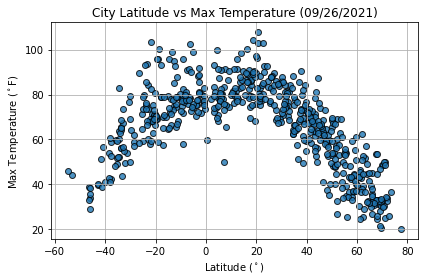

In [14]:
#Latitude vs Temperature Plot:
date1 = dt.now().strftime("(%m/%d/%Y)")
#marker="o", color = 'blue'
# Build a scatter plot 
plt.scatter(city_data["Lat"], city_data["Max Temp (°F)"], alpha = 0.8, edgecolors="k", linewidth=1)

#Label
plt.title("City Latitude vs Max Temperature " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Max Temperature ($^\circ$F)")

plt.grid(True)
plt.tight_layout()
#Save the figure before show
plt.savefig(output_folder + "1_CityLatVSTempPlot.png")
# Show plot
plt.show()

The Latitude vs Temperature (F) plot shown above, shows a cluster of high temperatures around/near the equator (0 Lat) (Note: At +-20 degrees it looks to have outliers, or other scenarios for this affect). 

The clusters, are generally showing, that as you get closer the equator the temperature will increase.

## Latitude vs. Humidity Plot

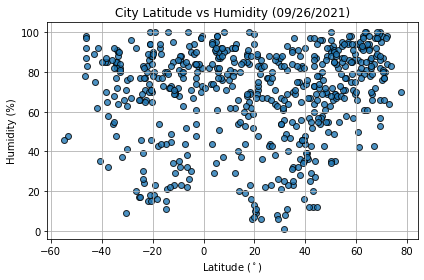

In [15]:
#Plot Latitude vs. Humidity
# Build a scatter plot 
plt.scatter(city_data["Lat"], city_data["Humidity (%)"], alpha = 0.8, edgecolors="k", linewidth=1)

#Label
plt.title("City Latitude vs Humidity " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")

plt.grid(True)
plt.tight_layout()

#Save the figure
plt.savefig(output_folder + "2_CityLatVSHumidityPlot.png")

# Show plot
plt.show()


The Latitude vs Humidity plot shown above, shows a wide distribution of data points. No clear relationship can be defined with latitude and humidity. The humidity percentages may cluster more above 60%.

## Latitude vs. Cloudiness Plot

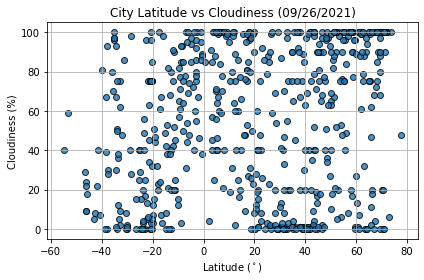

In [16]:
#Plot Latitude vs. Cloudiness
# Build a scatter plot 
plt.scatter(city_data["Lat"], city_data["Cloudiness (%)"],alpha = 0.8, edgecolors="k", linewidth=1)

#Label
plt.title("City Latitude vs Cloudiness " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")

plt.grid(True)
plt.tight_layout()

#Save the figure
plt.savefig(output_folder +  "3_CityLatitudeVSCloudinessPlot.png")

# Show plot
plt.show()


The Latitude vs Cloudiness plot shown above, shows a wide distribution of data points. Thus, no clear relationship can be seen between Latitude and Cloudiness. There seems to be some clustering around 0 and 100. These may be true values of very cloudy or very clear. Perhaps these values may be 'rounded' or 'categorized' from some of the sources, and may not represent continuous variables or measurements.



## Latitude vs. Wind Speed Plot

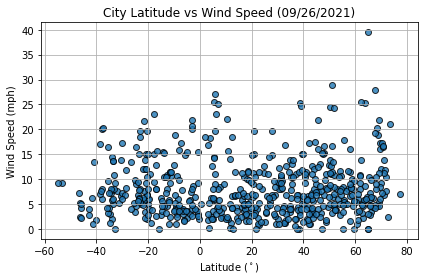

In [17]:
#Plot Latitude vs. Wind speed
# Build a scatter plot 
plt.scatter(city_data["Lat"], city_data["Wind Speed (mph)"], alpha = 0.8, edgecolors="k", linewidth=1)

#Label
plt.title("City Latitude vs Wind Speed " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)
plt.tight_layout()

#Save the figure
plt.savefig(output_folder + "4_CityLatVSWindSpeedPlot.png")

# Show plot
plt.show()

The Latitude vs Wind Speed plot, shows a wide distribution of data points, generally under 10 mph. No relationship can be defined between Latitude and Wind Speed.

## Linear Regression

Run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude




### Create Northern and Southern Hemisphere DataFrames

In [18]:
#North of the equator for the Northern Hemisphere DataFrame
northern = city_data[city_data["Lat"] >= 0]
print(f'Northern Hemisphere has {len(northern)} entries.')

#South of the equator for the Sourthern Hemisphere DataFrame
southern = city_data[city_data["Lat"] < 0]
print(f'Southern Hemisphere has {len(southern)} entries.')


Northern Hemisphere has 390 entries.
Southern Hemisphere has 185 entries.


### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

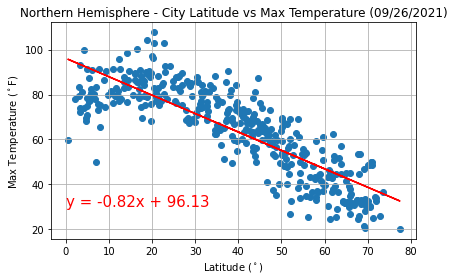

The r-squared is: 0.701597491006841


In [19]:
# get values 
x_values = northern["Lat"]
y_values = northern["Max Temp (°F)"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

#Labels
plt.title("Northern Hemisphere - City Latitude vs Max Temperature " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Max Temperature ($^\circ$F)")


plt.grid(True)
plt.tight_layout()

#save the figure and show
plt.savefig(output_folder + "5_NorthHemCityLatVSMaxTempLR.png")
plt.show()

# Print out the r-squared value
print(f"The r-squared is: {rvalue**2}")

The Latitude vs Max Temperature plot, for northern hemisphere cities, shows a 'negative correlation' between Latitude and Max Temperature. The further away, larger the positive latitude, (from zero being the equator), the lower the maximum temperature. The r-squared value of 0.701597491006841 shows that it is slightly above the 0.7 cutoff for a strong correlation. R=squared > 0.7 marker makes it a strong correlation. However, running this model more, this correlation value may jump to above or below the 0.7 mark.(R-square <0.7 moderate correlation) Thus, the correlation is currently a strong fit, but could have a moderate to strong fit.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

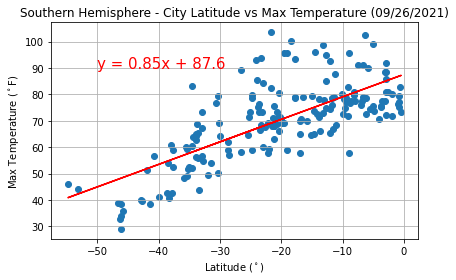

The r-squared is: 0.5247068120643601


In [29]:
#get values
x_values = southern["Lat"]
y_values = southern["Max Temp (°F)"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

#Labels
plt.title("Southern Hemisphere - City Latitude vs Max Temperature " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Max Temperature ($^\circ$F)")

plt.grid(True)
plt.tight_layout()

#Save and show
plt.savefig(output_folder + "6_SouthHemCityLatVSMaxTempLR.png")
plt.show()


print(f"The r-squared is: {rvalue**2}")

The Latitude vs Max Temperature plot for southern hemisphere cities, shows a positive correlation between Latitude in the Southern hemishere increasing, to zero latitude, and max temperature increasing. The r-squared value is 0.52, thus, this can be depicted as a 'moderate' correlation when depicting these categories.  Less than 0.5 is a weak representation. Thus, if other tests are done this might have a weak correlation. (>=0.5)
Thus, our model is currently a moderate fit, but may have a weak to moderate fit.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

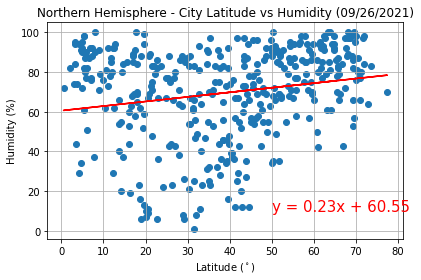

The r-squared is: 0.0384176224406666


In [30]:
#get the values
x_values = northern["Lat"]
y_values = northern["Humidity (%)"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

#Labels
plt.title("Northern Hemisphere - City Latitude vs Humidity " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")

plt.grid(True)
plt.tight_layout()

#save the figure
plt.savefig(output_folder + "7_NorthHemCityLatVSHumidityLR.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")

The Latitude vs Humidity plot in the northern hemisphere for cities shows that no correlation can be defined. The r-sqared value of 0.038 says that the is a very weak to no relationship.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

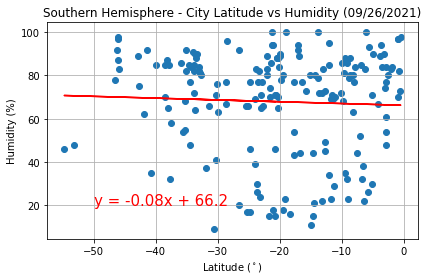

The r-squared is: 0.001907195360772496


In [31]:
#get values
x_values = southern["Lat"]
y_values = southern["Humidity (%)"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

#Labels
plt.title("Southern Hemisphere - City Latitude vs Humidity " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")

plt.grid(True)
plt.tight_layout()

#save the figure and show
plt.savefig(output_folder + "8_SouthHemCityLatVSHumidityLR.png")
plt.show()


print(f"The r-squared is: {rvalue**2}")

The  Latitude vs Humidity plot for the southern hemisphere cities shows no correlation. The r-squared value of 0.0019, when rounded. This is very low and close to zero. Thus, no correlation can be defined.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

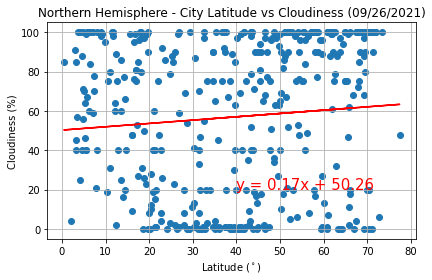

The r-squared is: 0.007782901785672205


In [32]:
#get values
x_values = northern["Lat"]
y_values = northern["Cloudiness (%)"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

#Labels
plt.title("Northern Hemisphere - City Latitude vs Cloudiness " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")


plt.grid(True)
plt.tight_layout()

#save the figure and show
plt.savefig(output_folder + "9_NorthHemCityLatVSCloudLR.png")
plt.show()


print(f"The r-squared is: {rvalue**2}")

The  Latitude vs Cloudiness plot for the northern hemisphere cities shows no correlation. The r-squared value of 0.0078 is low and close to zero. Thus, no correlation can be determined. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

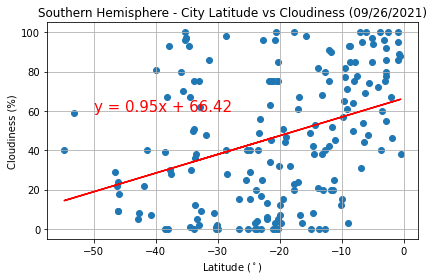

The r-squared is: 0.12805197657060435


In [34]:
#get values
x_values = southern["Lat"]
y_values = southern["Cloudiness (%)"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

#Labels
plt.title("Southern Hemisphere - City Latitude vs Cloudiness " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")

plt.grid(True)
plt.tight_layout()

#save the figure and show
plt.savefig(output_folder + "10_SoutHemCityLatVSCloudLR.png")
plt.show()


print(f"The r-squared is: {rvalue**2}")

The Latitude vs Cloudiness plot for the southern hemisphere cities shows no correlation between them. The r-square value of 0.128, no correlation can be determined. If there was a correlation, it would be very weak.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

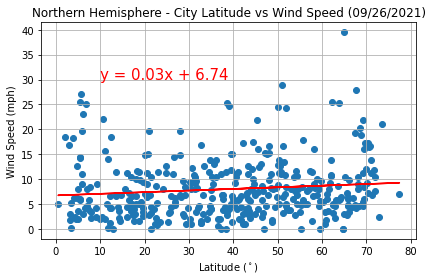

The r-squared is: 0.012379999120540011


In [36]:
#get values
x_values = northern["Lat"]
y_values = northern["Wind Speed (mph)"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

#Labels
plt.title("Northern Hemisphere - City Latitude vs Wind Speed " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)
plt.tight_layout()

#save the figure and show
plt.savefig(output_folder + "11_NorthHemCityLatVSWindSpeedLR.png")
plt.show()


print(f"The r-squared is: {rvalue**2}")

The Latitude vs Wind Speed plot the northern hemisphere cities shows no correlation between them. The r-squared value is 0.0124 which is close to zero and thus no correlation can be defined.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

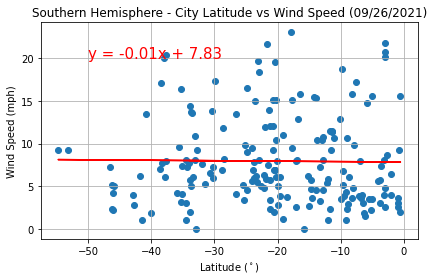

The r-squared is: 0.00016311961857414715


In [37]:
#get values
x_values = southern["Lat"]
y_values = southern["Wind Speed (mph)"]

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

#Labels
plt.title("Southern Hemisphere - City Latitude vs Wind Speed " + str(date1))
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)
plt.tight_layout()

#save the figure
plt.savefig(output_folder + "12_SouthHemCityLatVSWindSpeedLR.png")
plt.show()


print(f"The r-squared is: {rvalue**2}")

The Latitude vs Wind Speed plot for the southern hemisphere cities shows no correlation. The r-sqared value of 0.00016 is close to zero and thus no correlation can be determined for Latitude vs Wind Speed in the Southern Hemishere cities.